In [1]:
import numpy as np 
import pandas as pd 
import statistics
from sensitivity_analysis_utils import *
import os 
from tqdm import tqdm
import random

       Unnamed: 0         0
0            flow  0.000785
1             aum  0.000780
2  dividend_yield  0.002547
3   exp_ratio_net  0.000931
4        fee_rate  0.000768


In [2]:
example = pd.read_csv('sensitivity_bond/sensitivity_1725286982144.csv')
print(example.head())

       Unnamed: 0         0
0            flow  0.000785
1             aum  0.000780
2  dividend_yield  0.002547
3   exp_ratio_net  0.000931
4        fee_rate  0.000768


In [7]:
def plot_sensitivity_with_boostrap(M, N,  dirname='sensitivity_bond'):
    all_mean = [] #means for all feature across N trails, 2d array 
    all_p25= [] 
    all_p75= [] 
    all_models_csv ={}
    all_models =[]
    features = feature_names.copy()
    #read all csv 
    for root, dirs, files in os.walk(dirname):
        for file in files:
            filepath = os.path.join(root, file)
            df = pd.read_csv(filepath)
            sensitivity_df = get_normalized_sensitivity(features, df)
            all_models_csv[file] = sensitivity_df
            all_models.append(file)
    #boostrap process
    numloops = N if M>1 else 1
    for i in tqdm(range(numloops)):
        #sample from all models 
        if M>1:
            selected_models = random.sample(all_models, M)
        else:
            selected_models = all_models.copy()
        means_feature = []#all features over M models
        p25s_feature= [] #1d array, len = #features
        p75s_feature = []
        for feature in features:
            mean, p25, p75 = get_stats_for_feature(feature, selected_models, all_models_csv)
            means_feature.append(mean)
            p25s_feature.append(p25)
            p75s_feature.append(p75)
        all_mean.append(means_feature)
        all_p25.append(p25s_feature)
        all_p75.append(p75s_feature)
    #get element wise median across all N trails 
    final_medians = np.median(np.array(all_mean), axis=0)
    final_p25 = np.median(np.array(all_p25), axis=0)
    final_p75 = np.median(np.array(all_p75), axis=0)
    plot_box_chart(features, final_medians, final_p25, final_p75, targets=None, title=f'N{N}M{M}')

100%|██████████| 3000/3000 [49:38<00:00,  1.01it/s] 


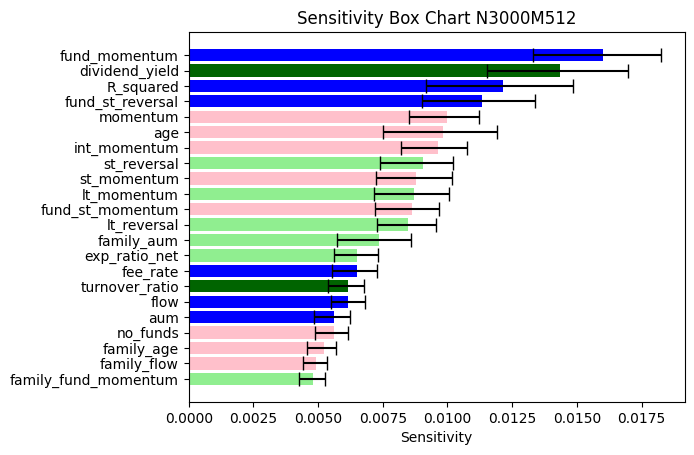

In [8]:
plot_sensitivity_with_boostrap(M=512, N=3000, dirname='sensitivity_bond')